In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
dft400 = pd.read_csv('02_25_2NodosFog/t2/Cc4g400.csv')
dft400  ["alarmas"]= "400"

dft800 = pd.read_csv('02_25_2NodosFog/t2/Cc4g800.csv')
dft800  ["alarmas"]= "800"

dft1200 = pd.read_csv('02_25_2NodosFog/t2/Cc4g1200.csv')
dft1200  ["alarmas"]= "1200"

dft1600 = pd.read_csv('02_25_2NodosFog/t2/Cc4g1600.csv')
dft1600  ["alarmas"]= "1600"

dft2000 = pd.read_csv('02_25_2NodosFog/t2/Cc4g2000.csv')
dft2000  ["alarmas"]= "2000"

dft2400 = pd.read_csv('02_25_2NodosFog/t2/Cc4g2400.csv')
dft2400  ["alarmas"]= "2400"

In [3]:
def Append6andCast(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6, O_column, simbol,value):
    mdtf1 = Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6)
    mdtf1[O_column] = CastOutLayers(mdtf1, O_column, simbol,value)
    return mdtf1

def Append6(mdtf1,mdtf2,mdtf3,mdtf4,mdtf5,mdtf6):
    mdtf1 = mdtf1.append(mdtf2)
    mdtf1 = mdtf1.append(mdtf3)
    mdtf1 = mdtf1.append(mdtf4)
    mdtf1 = mdtf1.append(mdtf5)
    return mdtf1.append(mdtf6)

def CastOutLayers(mdtf1, column, lowerorgreater,mlimit):
    aux = []
    for row in mdtf1[column]:
        if type(row) is str:
            row =row.replace(".", "")
        if lowerorgreater == "<":
            if float(row) > mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
        elif lowerorgreater == ">":
            if float(row) < mlimit:
                aux.append(mlimit)
            else:
                aux.append(float(row))
    return aux

def Plotbox(mdtf1,mcolum,morder):
    plt.rcParams['figure.dpi'] = 140
    sns.boxplot(x='alarmas', y=mcolum, data=mdtf1, order=morder)
    ax = plt.gca()
    ax.grid(True)
    plt.show()
    
def GetCutdf(mdfpost,column,signo,val):
    if signo == '<':
        return  mdfpost[mdfpost[column] < val ][[column,'alarmas']].reset_index(drop=True)
    else:
        return  mdfpost[mdfpost[column] > val ][[column,'alarmas']].reset_index(drop=True)
    
def AppendAndPlot(ndf,O_column, N_column, simbol, value, morder):
    ndf = Append2(df1, df2, df3, df4,df5,df6).reset_index(drop=True)
    ndf[N_column] = CastOutLayers(ndf, O_column, simbol,value)
    Plotbox(ndf,N_column,morder)

def getMean(df1,df2,df3,df4,df5,df6,N_column):
    return [df1[N_column].mean(),df2[N_column].mean(),df3[N_column].mean(),
            df4[N_column].mean(),df5[N_column].mean(),df6[N_column].mean()]

def CastAndPlot1(df1,N_column,yLabel,morder):
    plt.rcParams['figure.dpi'] = 200
    plt.plot(morder,df1)
    ax = plt.gca()
    ax.grid(True)
    ax.grid(color='black', linestyle='-', linewidth=0.05)
    ax.set_axis_bgcolor('white')
    plt.legend([N_column], loc='upper center')
    plt.xticks(np.arange(400, 2800, step=400))
    plt.xlabel('Nº Alarmas')
    plt.ylabel(yLabel)
    plt.savefig(N_column+'_O.eps', format='eps', dpi=1000)

In [4]:
morder=["400","800","1200","1600","2000","2400"]

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


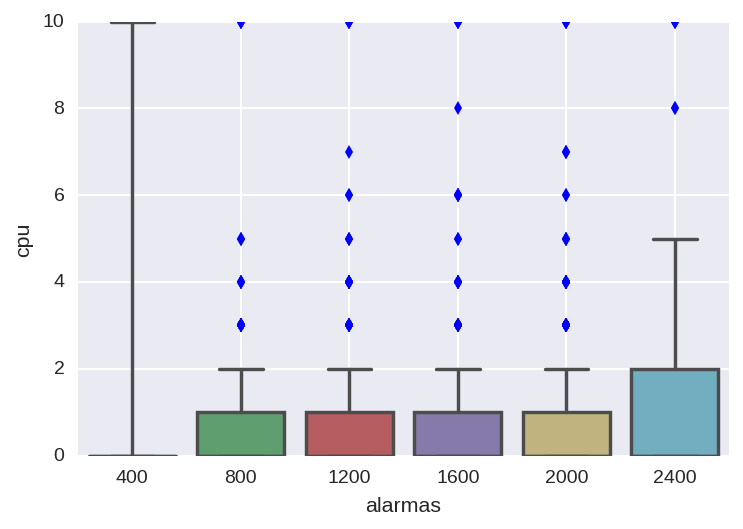

In [11]:
dft = Append6andCast(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"cpu","<",10)
Plotbox(dft,"cpu",morder)

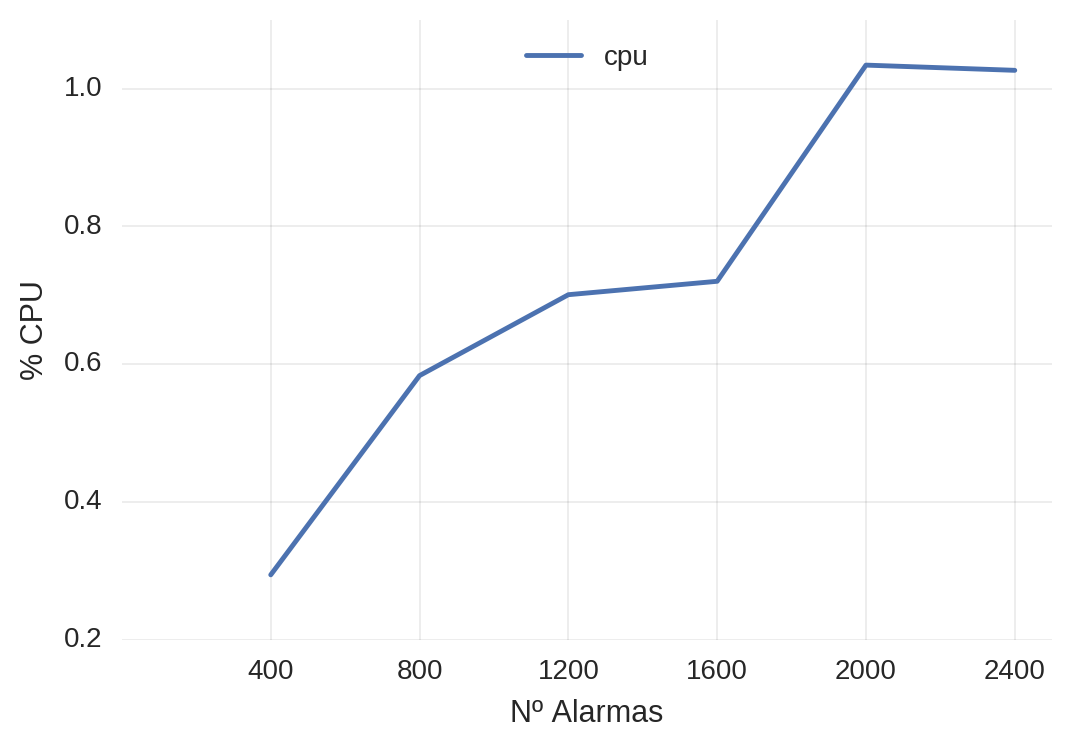

In [12]:
ldft = getMean(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"cpu")
CastAndPlot1(ldft,"cpu","% CPU",morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


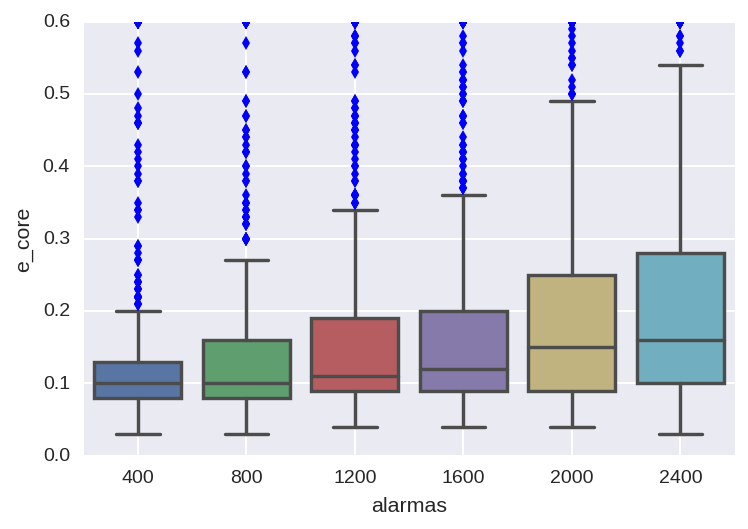

In [12]:
dft = Append6andCast(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"e_core","<",0.6)
Plotbox(dft,"e_core",morder)

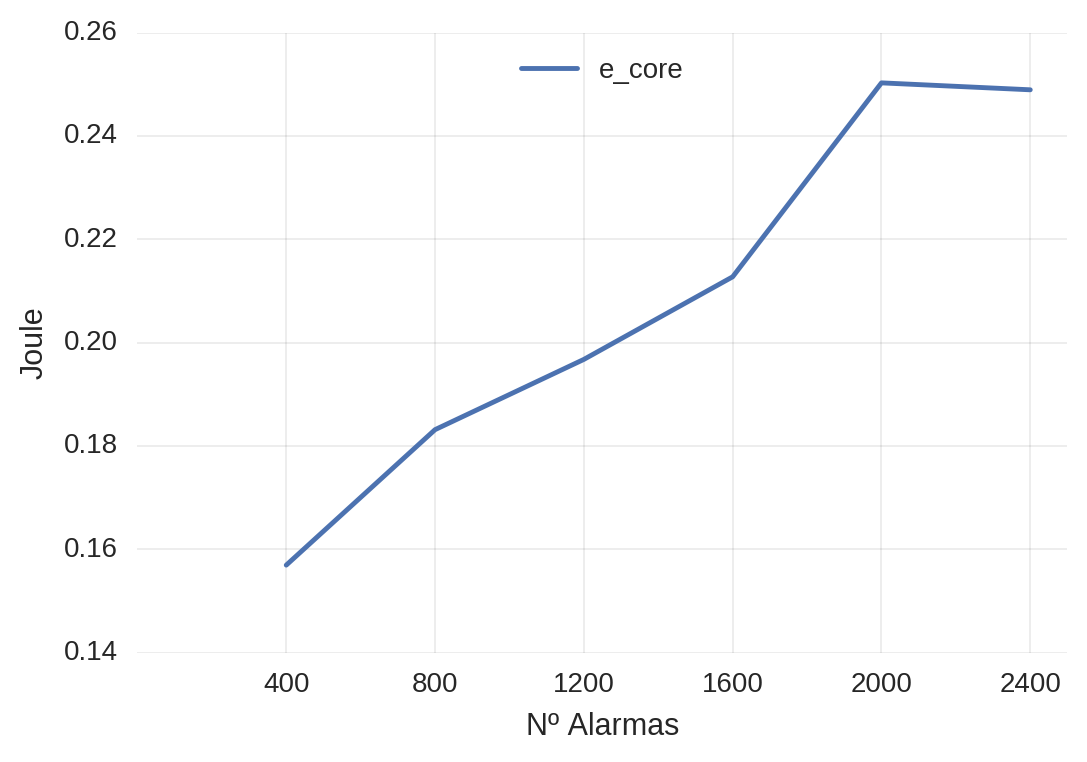

In [13]:
ldft = getMean(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"e_core")
CastAndPlot1(ldft,"e_core","Joule",morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


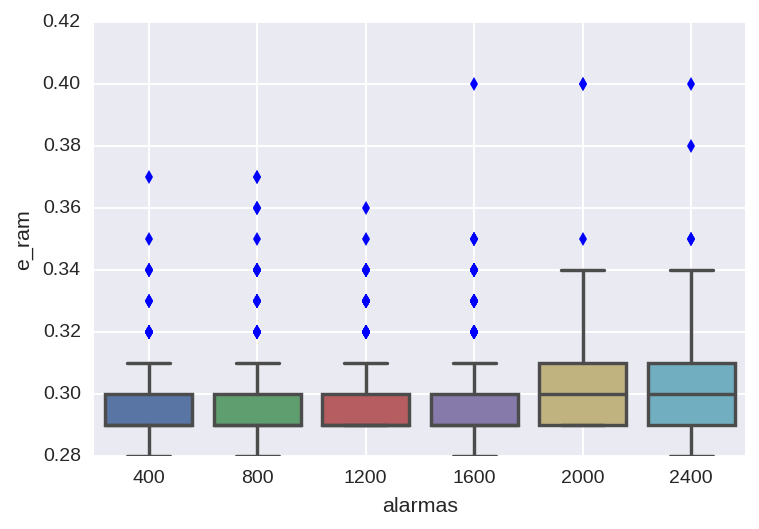

In [14]:
dft = Append6andCast(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"e_ram","<",0.4)
Plotbox(dft,"e_ram",morder)

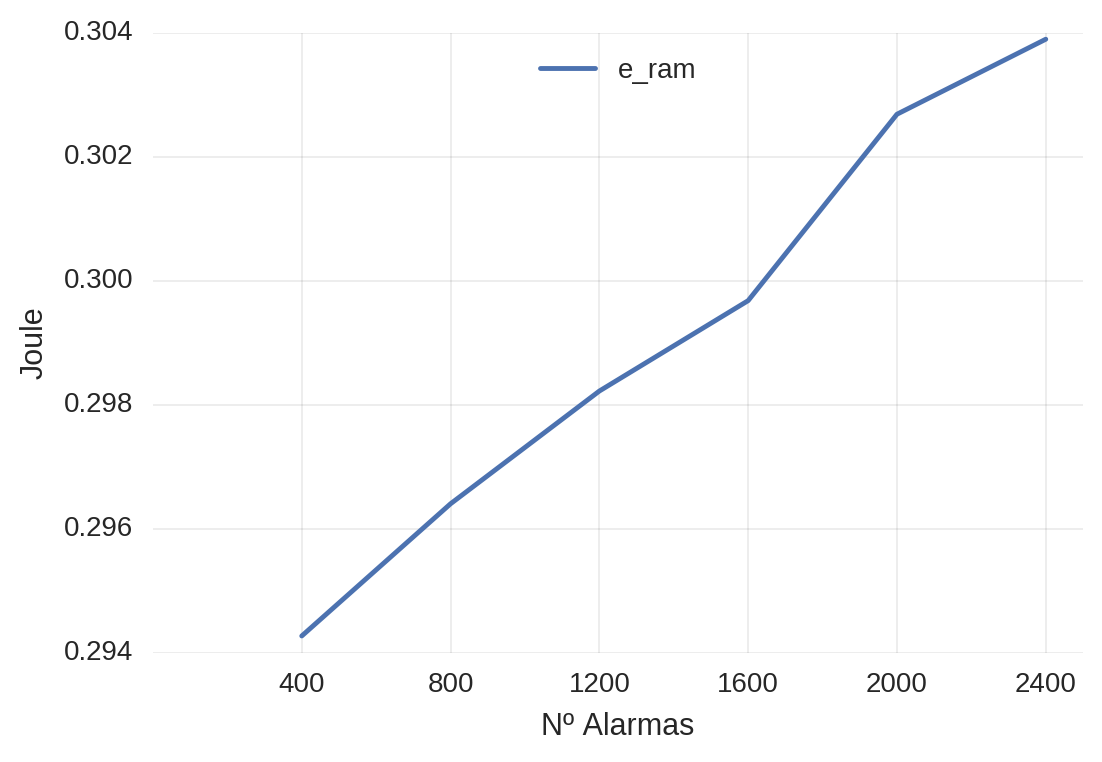

In [15]:
ldft = getMean(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"e_ram")
CastAndPlot1(ldft,"e_ram","Joule",morder)

/usr/lib/python3/dist-packages/matplotlib/__init__.py:894: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


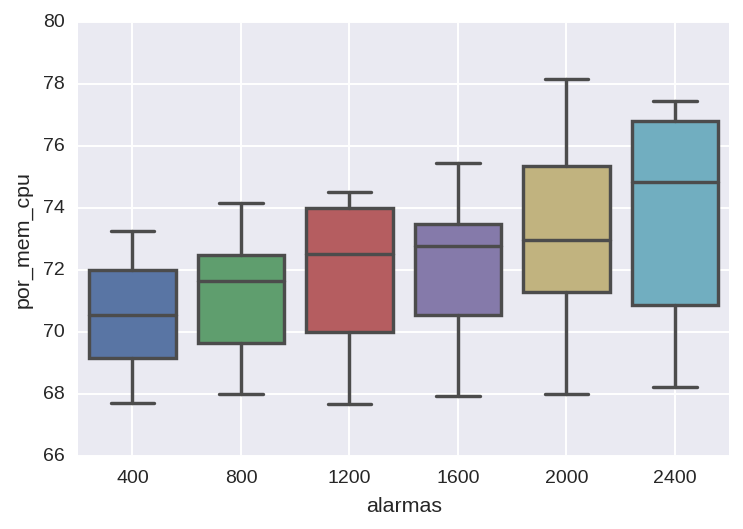

In [16]:
dft = Append6andCast(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"mem_used","<",4000000)
dft["por_mem_cpu"] = 100-100*dft["mem_used"]/8033560
Plotbox(dft,"por_mem_cpu",morder)

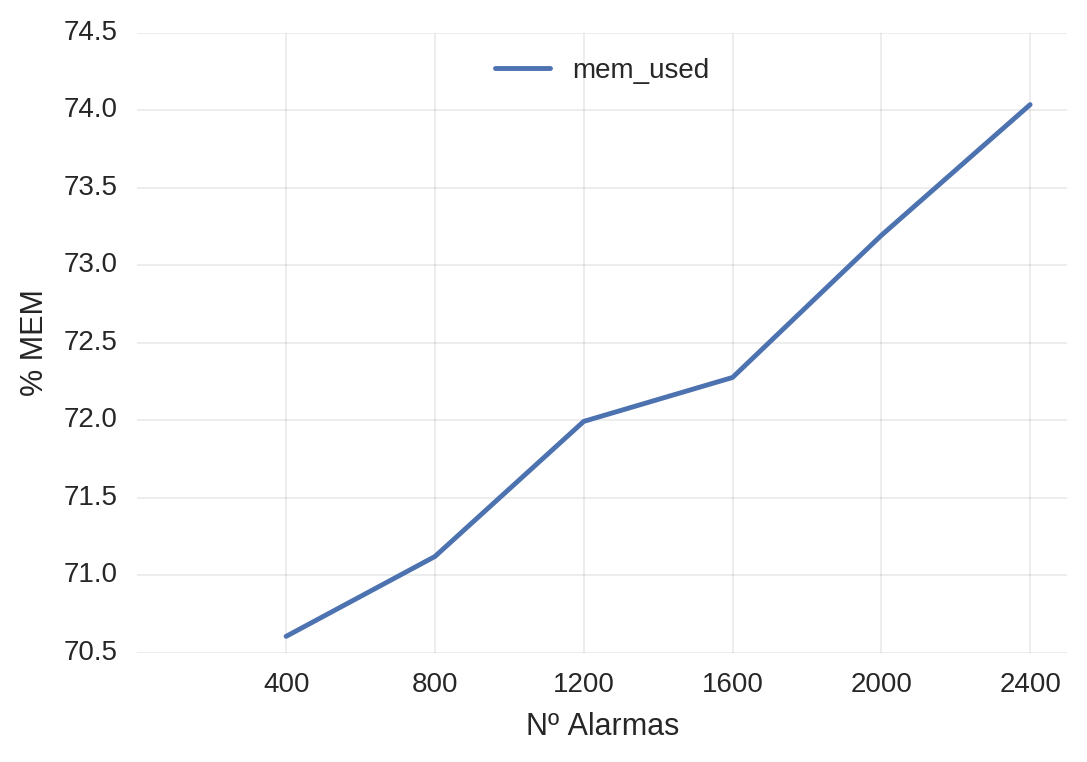

In [17]:
dft2 = getMean(dft400, dft800, dft1200, dft1600, dft2000, dft2400,"mem_used")

for i in range(len(dft2)):
    dft2[i] = 100-100*dft2[i]/8033560

CastAndPlot1(dft2,"mem_used","% MEM",morder)